/var/folders/cz/mrs9z_6925xf5jgc4pkxz2380000gn/T/ipykernel_69932/2645956550.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))


confidence:  0.9896520036511314
[2964.09161611 2797.86136005 2768.65735768 2834.9322677  2987.97658535
 2961.72638981 2887.18880058 2999.1221939  3115.60314618 3199.55058903
 3280.99080277 3285.8835797  3354.85852541 3324.79160204 3329.69453972
 3352.51362061 3438.1259409  3444.71382973 3383.52450323 3316.45779752
 3327.87749872 3425.05152301 3337.92698448 3230.34834354 3210.62507227
 3143.14227111 3075.36505578 3068.57419961 3165.07835731 3087.23133471]


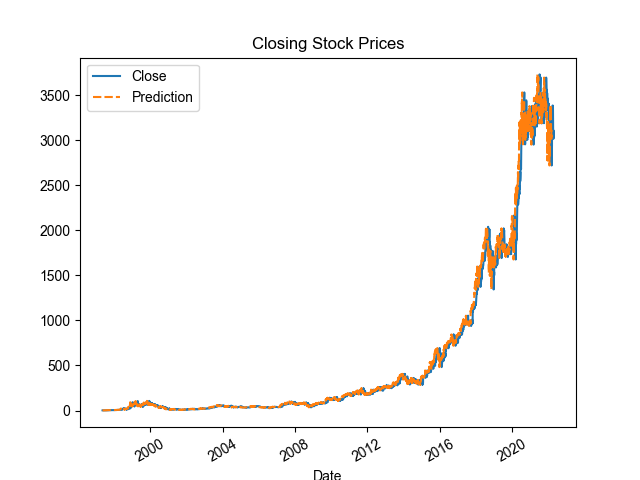

In [1]:
import quandl
import pandas as pd
import numpy as np
from datetime import date
%matplotlib widget
import matplotlib.pyplot as plt


import seaborn as sns
import yfinance as yf


from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
#replacement for cross validation
from sklearn.model_selection import train_test_split


ticker = yf.Ticker("AMZN")
df = ticker.history(period="max")

df = df[['Close']]
forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]
# below sentence has been modified for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)
temp=[]
for count in forecast_prediction:
    temp.append(count)



sns.lineplot(data=df)
sns.set_theme()  # Default seaborn style
plt.xticks(rotation=30)

plt.title(f"Closing Stock Prices")

plt.show()